<a href="https://colab.research.google.com/github/Edward-Eughene-Timothy/DQN-RL-for-Hikikomori-Reintegration/blob/testing/Reinforcement_learning_with_Deep_Q_Networks_for_Hikikomori_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym
!pip install keras-rl2
!pip install tensorflow==2.12.0
!pip install keras==2.12.0
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import gym
import numpy as np
from gym import spaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents import DQNAgent
from rl.policy import EpsGreedyQPolicy  # Changed to EpsGreedyQPolicy
from rl.memory import SequentialMemory

class HikikomoriEnv(gym.Env):
    def __init__(self):
        super(HikikomoriEnv, self).__init__()

        # Define state space (Social Engagement Level: 0 - 10)
        self.state = 0  # Start at lowest social engagement
        self.max_state = 10

        # Define action space (Task difficulty: 0 = Easy, 1 = Medium, 2 = Hard)
        self.action_space = spaces.Discrete(3)

        # Observation space (Current engagement level)
        self.observation_space = spaces.Box(low=0, high=self.max_state, shape=(1,), dtype=np.int32)

    def step(self, action):
        """
        Actions: 0 (Easy Task), 1 (Medium Task), 2 (Hard Task)
        Rewards are based on task completion (simulated randomly)
        """
        reward = 0
        done = False

        # Simulate user response (higher chance to complete easier tasks)
        success_prob = {0: 0.9, 1: 0.6, 2: 0.3}  # Probability of success per difficulty level
        completed = np.random.rand() < success_prob[action]

        if completed:
            self.state = min(self.state + 1, self.max_state)  # Increase engagement level
            reward = action + 1  # Reward based on task difficulty
        else:
            reward = -1  # Negative reward for failure

        # Check if max engagement level is reached
        if self.state == self.max_state:
            done = True

        return np.array([self.state]), reward, done, {}

    def reset(self):
        """ Reset environment to initial state """
        self.state = 0
        return np.array([self.state])  # Return the initial state observation

    def render(self, mode='human'):  # Add mode argument
        print(f"Current Social Engagement Level: {self.state}")


/usr/local/lib/python3.11/dist-packages/tensorflow/python/debug/cli/debugger_cli_common.py:19: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants
/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/util.py:52: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs.
  from jax import xla_computation as _xla_computation


In [ ]:
# Build Deep Q-Network (DQN) model
def build_model(state_shape, action_size):
    model = Sequential()
    model.add(Flatten(input_shape=(1,) + state_shape))  # Flatten input
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(action_size, activation='linear'))  # Output Q-values
    return model


In [ ]:
# Build DQN Agent
def build_agent(model, action_size):
    memory = SequentialMemory(limit=50000, window_length=1)
    policy = EpsGreedyQPolicy(eps=0.1)  # Changed to EpsGreedyQPolicy
    dqn = DQNAgent(model=model,
                   memory=memory,
                   policy=policy,
                   nb_actions=action_size,
                   nb_steps_warmup=10,
                   target_model_update=1e-2)
    return dqn

In [ ]:
if __name__ == "__main__":
    env = HikikomoriEnv()
    state_shape = env.observation_space.shape
    action_size = env.action_space.n
    warnings.filterwarnings('ignore')
    model = build_model(state_shape, action_size)
    dqn = build_agent(model, action_size)
    dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])
    print("Training DQN agent...")
    dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training DQN agent...
Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 79s 8ms/step - reward: 0.7797
625 episodes - episode_reward: 12.453 [1.000, 24.000] - loss: 0.331 - mae: 4.265 - mean_q: 6.393

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 78s 8ms/step - reward: 0.7473
586 episodes - episode_reward: 12.776 [-5.000, 21.000] - loss: 0.377 - mae: 4.618 - mean_q: 6.816

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 81s 8ms/step - reward: 0.7593
591 episodes - episode_reward: 12.846 [-2.000, 21.000] - loss: 0.391 - mae: 4.597 - mean_q: 6.768

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 82s 8ms/step - reward: 0.7541
589 episodes - episode_reward: 12.791 [-2.000, 22.000] - loss: 0.393 - mae: 4.609 - mean_q: 6.777

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 90s 9ms/step - reward: 0.779

In [ ]:
print("Testing trained agent...")
scores=dqn.test(env, nb_episodes=50, visualize=True)
print(np.mean(scores.history['episode_reward']))

Testing trained agent...
Testing for 50 episodes ...
Current Social Engagement Level: 1
Current Social Engagement Level: 2
Current Social Engagement Level: 3
Current Social Engagement Level: 4
Current Social Engagement Level: 5
Current Social Engagement Level: 6
Current Social Engagement Level: 7
Current Social Engagement Level: 7
Current Social Engagement Level: 8
Current Social Engagement Level: 9
Current Social Engagement Level: 9
Current Social Engagement Level: 9
Current Social Engagement Level: 9
Current Social Engagement Level: 10
Episode 1: reward: 16.000, steps: 14
Current Social Engagement Level: 1
Current Social Engagement Level: 2
Current Social Engagement Level: 2
Current Social Engagement Level: 3
Current Social Engagement Level: 4
Current Social Engagement Level: 5
Current Social Engagement Level: 6
Current Social Engagement Level: 6
Current Social Engagement Level: 6
Current Social Engagement Level: 6
Current Social Engagement Level: 7
Current Social Engagement Level: 8

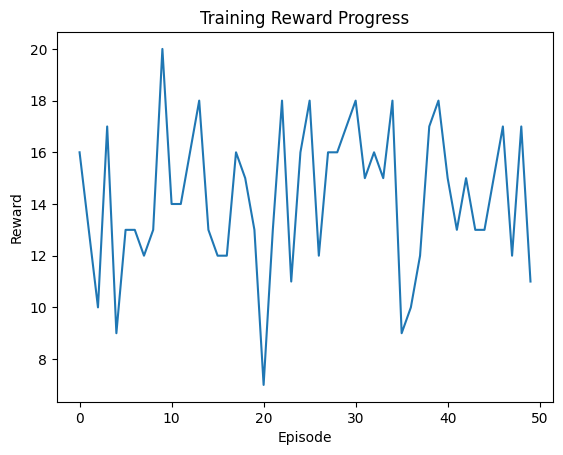

In [ ]:
import matplotlib.pyplot as plt

# Get the training history from DQN

# Extract rewards per episode
rewards = scores.history['episode_reward']

# Plot rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Reward Progress")
plt.show()


In [ ]:
import gym
import numpy as np
from gym import spaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents import DQNAgent
from rl.policy import EpsGreedyQPolicy  # Use EpsGreedyQPolicy for epsilon decay
from rl.memory import SequentialMemory

class HikikomoriEnv(gym.Env):
    def __init__(self):
        super(HikikomoriEnv, self).__init__()

        # Define state space (Social Engagement Level: 0 - 10)
        self.state = 0  # Start at lowest social engagement
        self.max_state = 10

        # Define action space (Task difficulty: 0 = Easy, 1 = Medium, 2 = Hard)
        self.action_space = spaces.Discrete(3)

        # Observation space (Current engagement level)
        self.observation_space = spaces.Box(low=0, high=self.max_state, shape=(1,), dtype=np.int32)

    def step(self, action):
        """
        Actions: 0 (Easy Task), 1 (Medium Task), 2 (Hard Task)
        Rewards are based on task completion (simulated randomly)
        """
        reward = 0
        done = False

        # Simulate user response (higher chance to complete easier tasks)
        success_prob = {0: 0.9, 1: 0.6, 2: 0.3}  # Probability of success per difficulty level
        completed = np.random.rand() < success_prob[action]

        if completed:
            self.state = min(self.state + 1, self.max_state)  # Increase engagement level
            reward = action + 1  # Reward based on task difficulty
        else:
            reward = -1  # Negative reward for failure

        # Check if max engagement level is reached
        if self.state == self.max_state:
            done = True

        return np.array([self.state]), reward, done, {}

    def reset(self):
        """ Reset environment to initial state """
        self.state = 0
        return np.array([self.state])  # Return the initial state observation

    def render(self, mode='human'):  # Add mode argument
        print(f"Current Social Engagement Level: {self.state}")

# Build Deep Q-Network (DQN) model
def build_model(state_shape, action_size):
    model = Sequential()
    model.add(Flatten(input_shape=(1,) + state_shape))  # Flatten input
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(action_size, activation='linear'))  # Output Q-values
    return model

# Build DQN Agent with epsilon decay
def build_agent(model, action_size):
    memory = SequentialMemory(limit=50000, window_length=1)

    # Set initial epsilon, minimum epsilon, and decay rate
    eps_init = 1.0  # Start with full exploration
    eps_min = 0.01  # Minimum epsilon value
    eps_decay = 0.995  # Decay rate (value between 0 and 1)

    # Create the EpsGreedyQPolicy with epsilon decay
    policy = EpsGreedyQPolicy(eps=eps_init)

    dqn = DQNAgent(model=model,
                   memory=memory,
                   policy=policy,
                   nb_actions=action_size,
                   nb_steps_warmup=10,
                   target_model_update=1e-2)
    return dqn

if __name__ == "__main__":
    env = HikikomoriEnv()
    state_shape = env.observation_space.shape
    action_size = env.action_space.n

    model = build_model(state_shape, action_size)
    dqn = build_agent(model, action_size)
    dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])
    print("Training DQN agent...")
    dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)


Training DQN agent...
Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 81s 8ms/step - reward: 0.5979
601 episodes - episode_reward: 9.930 [-3.000, 21.000] - loss: 0.528 - mae: 4.558 - mean_q: 6.649

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 83s 8ms/step - reward: 0.6223
607 episodes - episode_reward: 10.264 [-5.000, 22.000] - loss: 0.401 - mae: 4.777 - mean_q: 7.025

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 88s 9ms/step - reward: 0.5793
594 episodes - episode_reward: 9.753 [-6.000, 20.000] - loss: 0.408 - mae: 4.747 - mean_q: 6.965

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 92s 9ms/step - reward: 0.5831
596 episodes - episode_reward: 9.789 [-8.000, 19.000] - loss: 0.414 - mae: 4.719 - mean_q: 6.915

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 92s 9ms/step - reward: 0.5866


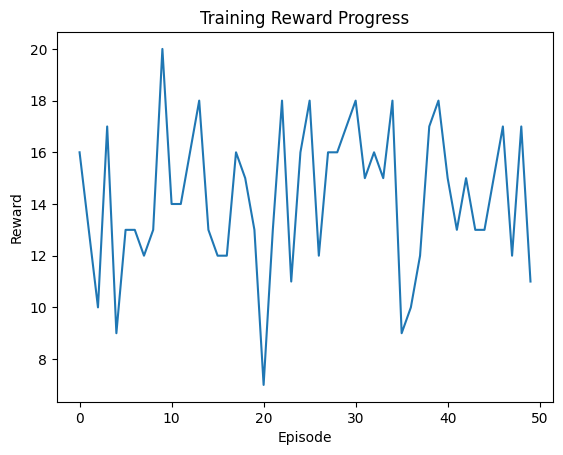

In [ ]:
import matplotlib.pyplot as plt

# Get the training history from DQN

# Extract rewards per episode
rewards = scores.history['episode_reward']

# Plot rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Reward Progress")
plt.show()



In [ ]:
import gym
import numpy as np
from gym import spaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents import DQNAgent
from rl.policy import EpsGreedyQPolicy  # Use EpsGreedyQPolicy for epsilon decay
from rl.memory import SequentialMemory

class HikikomoriEnv(gym.Env):
    def __init__(self):
        super(HikikomoriEnv, self).__init__()

        # Define state space (Social Engagement Level: 0 - 10)
        self.state = 0  # Start at lowest social engagement
        self.max_state = 10

        # Define action space (Task difficulty: 0 = Easy, 1 = Medium, 2 = Hard)
        self.action_space = spaces.Discrete(3)

        # Observation space (Current engagement level)
        self.observation_space = spaces.Box(low=0, high=self.max_state, shape=(1,), dtype=np.int32)

    def step(self, action):
        """
        Actions: 0 (Easy Task), 1 (Medium Task), 2 (Hard Task)
        Rewards are based on task completion (simulated randomly)
        """
        reward = 0
        done = False

        # Simulate user response (higher chance to complete easier tasks)
        success_prob = {0: 0.9, 1: 0.6, 2: 0.3}  # Probability of success per difficulty level
        completed = np.random.rand() < success_prob[action]

        if completed:
            self.state = min(self.state + 1, self.max_state)  # Increase engagement level
            reward = action + 1  # Reward based on task difficulty
        else:
            reward = -1  # Negative reward for failure

        # Check if max engagement level is reached
        if self.state == self.max_state:
            done = True

        return np.array([self.state]), reward, done, {}

    def reset(self):
        """ Reset environment to initial state """
        self.state = 0
        return np.array([self.state])  # Return the initial state observation

    def render(self, mode='human'):  # Add mode argument
        print(f"Current Social Engagement Level: {self.state}")

# Build Deep Q-Network (DQN) model
def build_model(state_shape, action_size):
    model = Sequential()
    model.add(Flatten(input_shape=(1,) + state_shape))  # Flatten input
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(action_size, activation='linear'))  # Output Q-values
    return model

# Build DQN Agent with epsilon decay
def build_agent(model, action_size):
    memory = SequentialMemory(limit=50000, window_length=1)

    # Set initial epsilon, minimum epsilon, and decay rate
    eps_init = 1.0  # Start with full exploration
    eps_min = 0.01  # Minimum epsilon value
    eps_decay = 0.995  # Decay rate (value between 0 and 1)

    # Create the EpsGreedyQPolicy with epsilon decay
    policy = EpsGreedyQPolicy(eps=eps_min )

    dqn = DQNAgent(model=model,
                   memory=memory,
                   policy=policy,
                   nb_actions=action_size,
                   nb_steps_warmup=10,
                   target_model_update=1e-2)
    return dqn

if __name__ == "__main__":
    env = HikikomoriEnv()
    state_shape = env.observation_space.shape
    action_size = env.action_space.n

    model = build_model(state_shape, action_size)
    dqn = build_agent(model, action_size)
    dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])
    print("Training DQN agent...")
    dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)


Training DQN agent...
Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 87s 9ms/step - reward: 0.7530
578 episodes - episode_reward: 13.010 [-4.000, 19.000] - loss: 0.534 - mae: 4.356 - mean_q: 6.685

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 86s 9ms/step - reward: 0.7631
587 episodes - episode_reward: 13.014 [-1.000, 20.000] - loss: 0.418 - mae: 4.704 - mean_q: 7.017

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 90s 9ms/step - reward: 0.7865
594 episodes - episode_reward: 13.246 [-1.000, 20.000] - loss: 0.410 - mae: 4.665 - mean_q: 6.934

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 93s 9ms/step - reward: 0.7833
592 episodes - episode_reward: 13.213 [1.000, 20.000] - loss: 0.407 - mae: 4.700 - mean_q: 6.962

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 96s 10ms/step - reward: 0.77

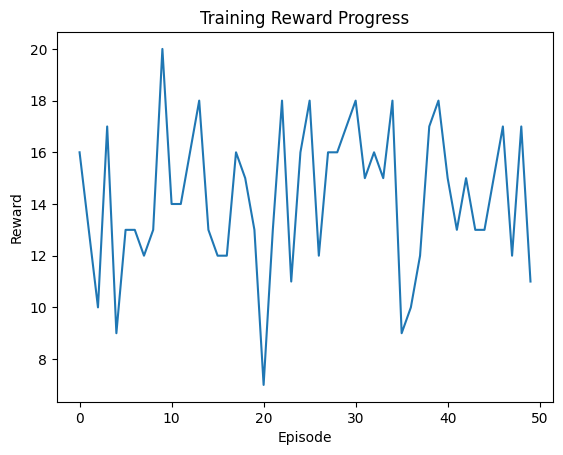

In [ ]:
import matplotlib.pyplot as plt

# Get the training history from DQN

# Extract rewards per episode
rewards = scores.history['episode_reward']

# Plot rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Reward Progress")
plt.show()



In [ ]:
import gym
import numpy as np
from gym import spaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents import DQNAgent
from rl.policy import EpsGreedyQPolicy  # Use EpsGreedyQPolicy for epsilon decay
from rl.memory import SequentialMemory

class HikikomoriEnv(gym.Env):
    def __init__(self):
        super(HikikomoriEnv, self).__init__()

        # Define state space (Social Engagement Level: 0 - 10)
        self.state = 0  # Start at lowest social engagement
        self.max_state = 10

        # Define action space (Task difficulty: 0 = Easy, 1 = Medium, 2 = Hard)
        self.action_space = spaces.Discrete(3)

        # Observation space (Current engagement level)
        self.observation_space = spaces.Box(low=0, high=self.max_state, shape=(1,), dtype=np.int32)

    def step(self, action):
        """
        Actions: 0 (Easy Task), 1 (Medium Task), 2 (Hard Task)
        Rewards are based on task completion (simulated randomly)
        """
        reward = 0
        done = False

        # Simulate user response (higher chance to complete easier tasks)
        success_prob = {0: 0.9, 1: 0.6, 2: 0.3}  # Probability of success per difficulty level
        completed = np.random.rand() < success_prob[action]

        if completed:
            self.state = min(self.state + 1, self.max_state)  # Increase engagement level
            reward = action + 1  # Reward based on task difficulty
        else:
            reward = -1  # Negative reward for failure

        # Check if max engagement level is reached
        if self.state == self.max_state:
            done = True

        return np.array([self.state]), reward, done, {}

    def reset(self):
        """ Reset environment to initial state """
        self.state = 0
        return np.array([self.state])  # Return the initial state observation

    def render(self, mode='human'):  # Add mode argument
        print(f"Current Social Engagement Level: {self.state}")

# Build Deep Q-Network (DQN) model
def build_model(state_shape, action_size):
    model = Sequential()
    model.add(Flatten(input_shape=(1,) + state_shape))  # Flatten input
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(action_size, activation='linear'))  # Output Q-values
    return model

# Build DQN Agent with epsilon decay
def build_agent(model, action_size):
    memory = SequentialMemory(limit=50000, window_length=1)

    # Set initial epsilon, minimum epsilon, and decay rate
    eps_init = 1.0  # Start with full exploration
    eps_min = 0.01  # Minimum epsilon value
    eps_decay = 0.995  # Decay rate (value between 0 and 1)

    # Create the EpsGreedyQPolicy with epsilon decay
    policy = EpsGreedyQPolicy(eps=0.6 )

    dqn = DQNAgent(model=model,
                   memory=memory,
                   policy=policy,
                   nb_actions=action_size,
                   nb_steps_warmup=10,
                   target_model_update=1e-2)
    return dqn

if __name__ == "__main__":
    env = HikikomoriEnv()
    state_shape = env.observation_space.shape
    action_size = env.action_space.n

    model = build_model(state_shape, action_size)
    dqn = build_agent(model, action_size)
    dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])
    print("Training DQN agent...")
    dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)


Training DQN agent...
Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 91s 9ms/step - reward: 0.6436
595 episodes - episode_reward: 10.803 [-2.000, 21.000] - loss: 0.548 - mae: 4.347 - mean_q: 6.312

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 94s 9ms/step - reward: 0.6742
597 episodes - episode_reward: 11.295 [-8.000, 21.000] - loss: 0.425 - mae: 4.547 - mean_q: 6.637

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 90s 9ms/step - reward: 0.6766
596 episodes - episode_reward: 11.364 [-8.000, 21.000] - loss: 0.420 - mae: 4.625 - mean_q: 6.762

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 94s 9ms/step - reward: 0.6594
592 episodes - episode_reward: 11.133 [-2.000, 20.000] - loss: 0.423 - mae: 4.650 - mean_q: 6.791

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 94s 9ms/step - reward: 0.65

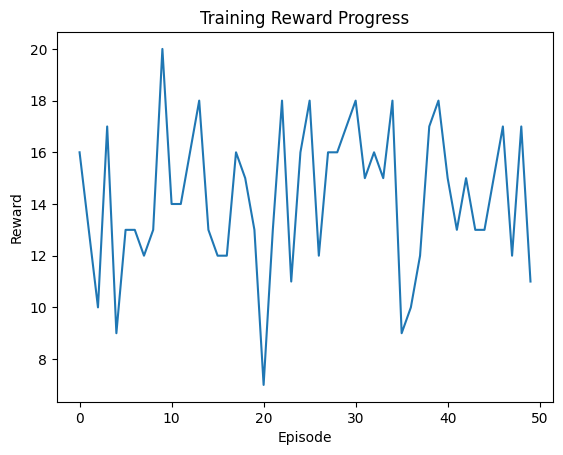

In [ ]:
import matplotlib.pyplot as plt

# Get the training history from DQN

# Extract rewards per episode
rewards = scores.history['episode_reward']

# Plot rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Reward Progress")
plt.show()



Instructions for updating:
Colocations handled automatically by placer.


Training DQN agent...
Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 98s 10ms/step - reward: 0.5934
596 episodes - episode_reward: 9.936 [-5.000, 22.000] - loss: 0.911 - mae: 2.570 - mean_q: 3.536

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 108s 11ms/step - reward: 0.6069
606 episodes - episode_reward: 10.043 [-8.000, 20.000] - loss: 0.724 - mae: 4.824 - mean_q: 6.970

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 113s 11ms/step - reward: 0.6105
602 episodes - episode_reward: 10.138 [-5.000, 21.000] - loss: 0.694 - mae: 5.214 - mean_q: 7.556

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 115s 12ms/step - reward: 0.6191
605 episodes - episode_reward: 10.223 [-9.000, 21.000] - loss: 0.666 - mae: 5.055 - mean_q: 7.329

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 116s 12ms/step - rewa

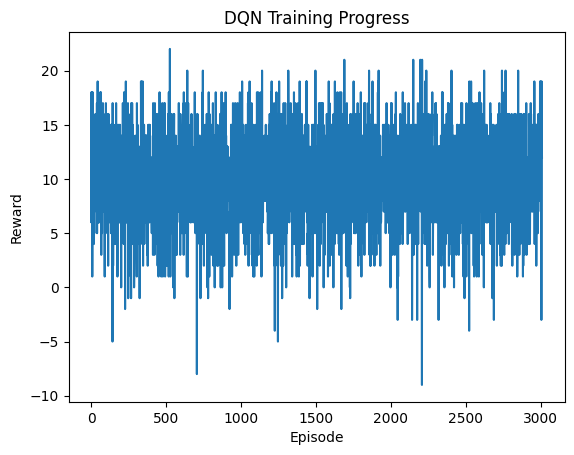

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym import spaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

# Custom Environment
class HikikomoriEnv(gym.Env):
    def __init__(self):
        super(HikikomoriEnv, self).__init__()
        self.state = 0
        self.max_state = 10
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(low=0, high=self.max_state, shape=(1,), dtype=np.int32)

    def step(self, action):
        reward = 0
        done = False
        success_prob = {0: 0.9, 1: 0.6, 2: 0.3}
        completed = np.random.rand() < success_prob[action]
        if completed:
            self.state = min(self.state + 1, self.max_state)
            reward = action + 1
        else:
            reward = -1
        if self.state == self.max_state:
            done = True
        return np.array([self.state]), reward, done, {}

    def reset(self):
        self.state = 0
        return np.array([self.state])

    def render(self, mode='human'):
        print(f"Current Social Engagement Level: {self.state}")

# Build Dueling DQN Model
def build_model(state_shape, action_size):
    model = Sequential()
    model.add(Flatten(input_shape=(1,) + state_shape))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(action_size, activation='linear'))
    return model

# Build DQN Agent with Adaptive Epsilon Decay
def build_agent(model, action_size):
    memory = SequentialMemory(limit=100000, window_length=1)
    policy = EpsGreedyQPolicy(eps=1.0)  # Start with high exploration
    dqn = DQNAgent(model=model,
                   memory=memory,
                   policy=policy,
                   nb_actions=action_size,
                   nb_steps_warmup=1000,
                   target_model_update=1e-3)
    return dqn

if __name__ == "__main__":
    env = HikikomoriEnv()
    state_shape = env.observation_space.shape
    action_size = env.action_space.n
    model = build_model(state_shape, action_size)
    dqn = build_agent(model, action_size)
    dqn.compile(Adam(learning_rate=5e-4, decay=1e-6), metrics=['mae'])

    print("Training DQN agent...")
    history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

    # Plot Results
    plt.plot(history.history['episode_reward'])
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('DQN Training Progress')
    plt.show()


Training DQN agent...
Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 115s 11ms/step - reward: 0.5745
592 episodes - episode_reward: 9.701 [-3.000, 23.000] - loss: 1.153 - mae: 1.851 - mean_q: 2.533

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 125s 13ms/step - reward: 0.6095
604 episodes - episode_reward: 10.093 [-8.000, 23.000] - loss: 0.860 - mae: 3.999 - mean_q: 5.729

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 131s 13ms/step - reward: 0.5982
600 episodes - episode_reward: 9.957 [-6.000, 21.000] - loss: 0.771 - mae: 4.737 - mean_q: 6.815

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 136s 14ms/step - reward: 0.5701
591 episodes - episode_reward: 9.662 [-12.000, 19.000] - loss: 0.731 - mae: 4.779 - mean_q: 6.880

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 142s 14ms/step - rewa

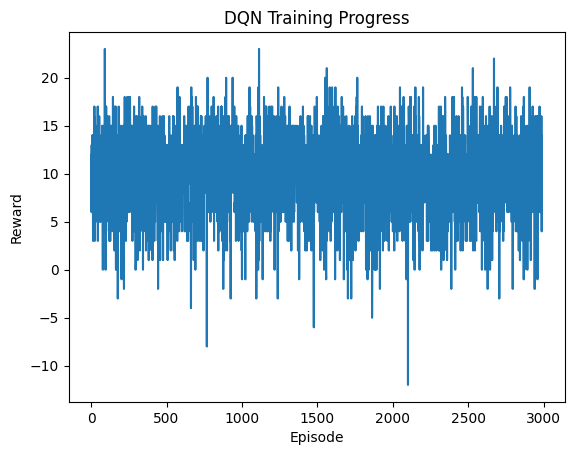

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym import spaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

class HikikomoriEnv(gym.Env):
    def __init__(self):
        super(HikikomoriEnv, self).__init__()
        self.state = 0
        self.max_state = 10
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(low=0, high=self.max_state, shape=(1,), dtype=np.int32)

    def step(self, action):
        reward = 0
        done = False
        success_prob = {0: 0.9, 1: 0.6, 2: 0.3}
        completed = np.random.rand() < success_prob[action]
        if completed:
            self.state = min(self.state + 1, self.max_state)
            reward = action + 1
        else:
            reward = -1
        if self.state == self.max_state:
            done = True
        return np.array([self.state]), reward, done, {}

    def reset(self):
        self.state = 0
        return np.array([self.state])

    def render(self, mode='human'):
        print(f"Current Social Engagement Level: {self.state}")

# Build Deep Q-Network with Dueling DQN
def build_model(state_shape, action_size):
    model = Sequential()
    model.add(Flatten(input_shape=(1,) + state_shape))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(action_size, activation='linear'))
    return model

# Build DQN Agent with PER & Adaptive Epsilon Decay
def build_agent(model, action_size):
    memory = SequentialMemory(limit=100000, window_length=1)  # Increased memory
    policy = EpsGreedyQPolicy(eps=1.0)  # Start with full exploration
    dqn = DQNAgent(model=model,
                   memory=memory,
                   policy=policy,
                   nb_actions=action_size,
                   nb_steps_warmup=1000,  # Longer warmup for stable training
                   target_model_update=1e-3,  # More frequent updates
                   gamma=0.99,  # Higher discount factor
                   batch_size=64)  # Increased batch size
    return dqn

if __name__ == "__main__":
    env = HikikomoriEnv()
    state_shape = env.observation_space.shape
    action_size = env.action_space.n
    model = build_model(state_shape, action_size)
    dqn = build_agent(model, action_size)
    dqn.compile(Adam(learning_rate=1e-4), metrics=['mae'])

    print("Training DQN agent...")
    history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

    # Plot training results
    plt.plot(history.history['episode_reward'])
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('DQN Training Progress')
    plt.show()


Training with policy=epsilon, epsilon=1.0, learning_rate=0.001
Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 125s 12ms/step - reward: 0.5977
596 episodes - episode_reward: 10.007 [-2.000, 20.000] - loss: 0.972 - mae: 3.144 - mean_q: 4.434

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 138s 14ms/step - reward: 0.6216
607 episodes - episode_reward: 10.241 [-2.000, 21.000] - loss: 0.749 - mae: 5.262 - mean_q: 7.625

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 143s 14ms/step - reward: 0.6089
600 episodes - episode_reward: 10.162 [-5.000, 21.000] - loss: 0.642 - mae: 5.053 - mean_q: 7.345

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 149s 15ms/step - reward: 0.6230
607 episodes - episode_reward: 10.259 [-3.000, 20.000] - loss: 0.657 - mae: 5.423 - mean_q: 7.887

Interval 5 (40000 steps performed)
10000/10000 [============

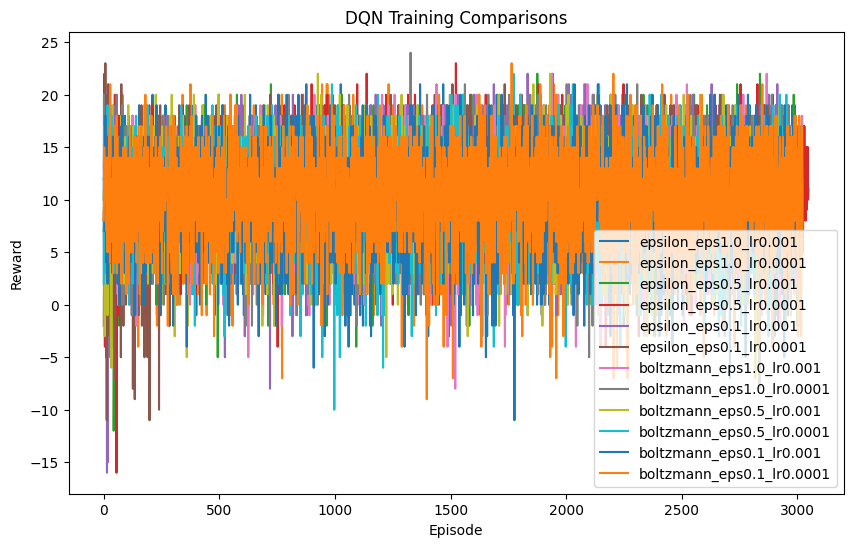

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym import spaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy, BoltzmannQPolicy
from rl.memory import SequentialMemory

class HikikomoriEnv(gym.Env):
    def __init__(self):
        super(HikikomoriEnv, self).__init__()
        self.state = 0
        self.max_state = 10
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(low=0, high=self.max_state, shape=(1,), dtype=np.int32)

    def step(self, action):
        reward = 0
        done = False
        success_prob = {0: 0.9, 1: 0.6, 2: 0.3}
        completed = np.random.rand() < success_prob[action]
        if completed:
            self.state = min(self.state + 1, self.max_state)
            reward = action + 1
        else:
            reward = -1
        if self.state == self.max_state:
            done = True
        return np.array([self.state]), reward, done, {}

    def reset(self):
        self.state = 0
        return np.array([self.state])

    def render(self, mode='human'):
        print(f"Current Social Engagement Level: {self.state}")

# Build Deep Q-Network with Dueling DQN
def build_model(state_shape, action_size):
    model = Sequential()
    model.add(Flatten(input_shape=(1,) + state_shape))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(action_size, activation='linear'))
    return model

# Build DQN Agent with different policies and parameters
def build_agent(model, action_size, policy_type, eps):
    memory = SequentialMemory(limit=100000, window_length=1)
    policy = EpsGreedyQPolicy(eps=eps) if policy_type == 'epsilon' else BoltzmannQPolicy()
    dqn = DQNAgent(model=model,
                   memory=memory,
                   policy=policy,
                   nb_actions=action_size,
                   nb_steps_warmup=1000,
                   target_model_update=1e-3,
                   gamma=0.99,
                   batch_size=64)
    return dqn

if __name__ == "__main__":
    env = HikikomoriEnv()
    state_shape = env.observation_space.shape
    action_size = env.action_space.n

    policies = ['epsilon', 'boltzmann']
    eps_values = [1.0, 0.5, 0.1]
    learning_rates = [1e-3, 1e-4]

    results = {}

    for policy_type in policies:
        for eps in eps_values:
            for lr in learning_rates:
                print(f"Training with policy={policy_type}, epsilon={eps}, learning_rate={lr}")
                model = build_model(state_shape, action_size)
                dqn = build_agent(model, action_size, policy_type, eps)
                dqn.compile(Adam(learning_rate=lr), metrics=['mae'])
                history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

                # Store results
                key = f"{policy_type}_eps{eps}_lr{lr}"
                results[key] = history.history['episode_reward']

    # Plot results
    plt.figure(figsize=(10, 6))
    for key, rewards in results.items():
        plt.plot(rewards, label=key)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('DQN Training Comparisons')
    plt.legend()
    plt.show()
